# Lab 3: 

# Please read the variable info at 'readme.html', choose at least two sets of variables to analyze including but not limited to, showing their basic statistic and visualization.
# Brief explain what you found. For example, you can show correlation between several variables and explain why their relation make sense, or discover skewness, outlier etc for certain variables.

In [37]:
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


## Read in the datasets and extract a subset for each

In [30]:
use_cols = [
    # 29 columns out of 109
    "Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime",
    "ArrTime", "CRSArrTime", "Reporting_Airline","Flight_Number_Reporting_Airline", 
    "Tail_Number", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest",
    "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
    "LateAircraftDelay"
]

total_rows = sum(1 for _ in open('On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv')) - 1
sample_size = 100000
skip_indices = sorted(random.sample(range(1, total_rows + 1), total_rows - sample_size))

reader = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv',
    usecols=use_cols,
    skiprows=skip_indices,
    chunksize=1000
)
df = pd.concat([chunk for chunk in reader])

## Data Analysis for the Two Variables 

## Cancelled Flights vs. Weather Conditions

In [31]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019,1,4,5,OO,N932SW,5658,SGF,IAH,643,...,0,132.0,121.0,88.0,513,NaN,NaN,NaN,NaN,NaN
1,2019,1,4,5,OO,N795SK,5687,SFO,SNA,1430,...,0,93.0,89.0,64.0,372,NaN,NaN,NaN,NaN,NaN
2,2019,1,4,5,OO,N982SW,5700,SFO,RDM,2245,...,0,113.0,86.0,59.0,462,NaN,NaN,NaN,NaN,NaN
3,2019,1,4,5,OO,N150SY,5704,LAX,SLC,2101,...,0,118.0,115.0,83.0,590,NaN,NaN,NaN,NaN,NaN
4,2019,1,4,5,OO,N973SW,5709,SFO,STS,2100,...,0,55.0,35.0,14.0,66,NaN,NaN,NaN,NaN,NaN


In [47]:
# Analysing the two variables 
variable_cols = ['Flight_Number_Reporting_Airline', 'DepDelay']
variable_stats = df[variable_cols].describe()
print("Basic statistics for delay variables:\n", variable_stats)

Basic statistics for delay variables:
        Flight_Number_Reporting_Airline      DepDelay
count                    100000.000000  97126.000000
mean                       2541.444070      9.690340
std                        1821.830804     49.161331
min                           1.000000    -44.000000
25%                         989.000000     -6.000000
50%                        2114.000000     -3.000000
75%                        3923.000000      6.000000
max                        7439.000000   1651.000000


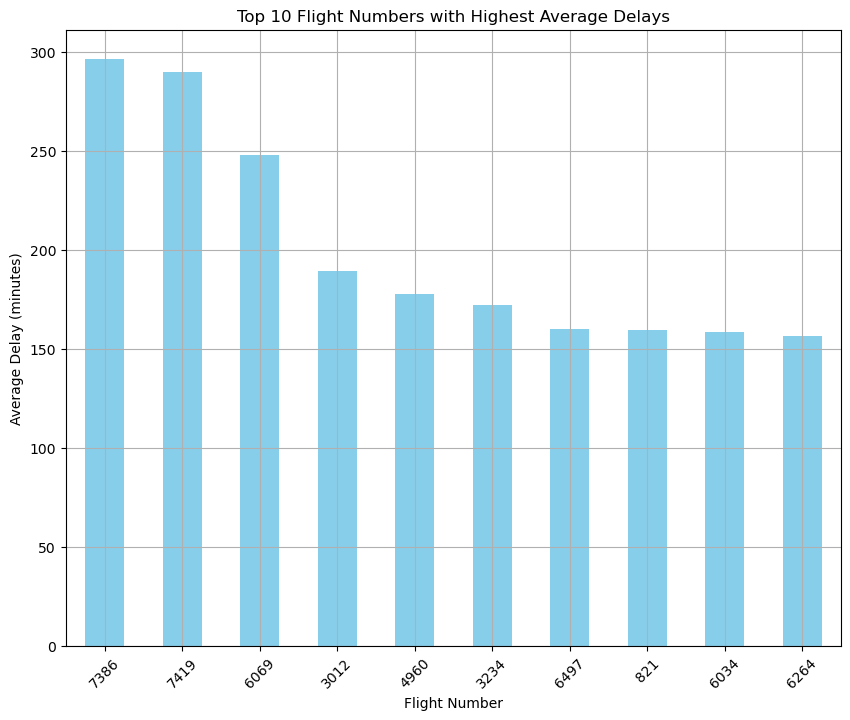

In [48]:
average_delays = df.groupby('Flight_Number_Reporting_Airline')['DepDelay'].mean().sort_values(ascending=False)

# Select the top 10 flight numbers with the highest average delays
top_flights = average_delays.head(10)

# Plotting
plt.figure(figsize=(10, 8))
top_flights.plot(kind='bar', color='skyblue')
plt.title('Top 10 Flight Numbers with Highest Average Delays')
plt.xlabel('Flight Number')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Box Plot of Variables')

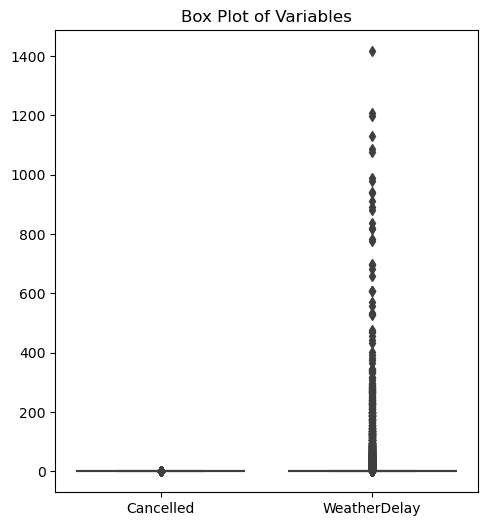

In [33]:
# Boxplot for visualizing distributions and outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[variable_cols])
plt.title('Box Plot of Variables')

/home/ubuntu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


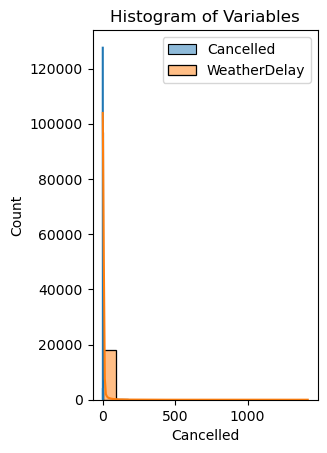

In [34]:
# Histogram for understanding the distribution
plt.subplot(1, 2, 2)
for col in variable_cols:
    sns.histplot(df[col], kde=True, label=f'{col}')
plt.title('Histogram of Variables')
plt.legend()
plt.show()

In [35]:
correlation_matrix = df[variable_cols].corr()
print("Correlation matrix:\n", correlation_matrix)


Correlation matrix:
               Cancelled  WeatherDelay
Cancelled           1.0           NaN
WeatherDelay        NaN           1.0
